In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [33]:
#df = pd.read_csv("../processed_data/data_cleaned_Carmen/")

In [34]:
df = pd.read_csv("../processed_data/data_cleaned_Carmen/20231129_char_preds_origin_episode_isAlive.csv")

In [35]:
df.head()

,Unnamed: 0,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
2,2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN
3,3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
4,4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN


In [36]:
X = df
X = X.drop(columns = ["Unnamed: 0","name",'isAlive'], axis=1)

In [37]:
X.head()

,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,episode_global_num
0,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,NaN
1,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,60.0
2,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,NaN
3,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,NaN
4,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,NaN


In [38]:
y = df["isAlive"]
y = y.to_frame(name="isAlive")
y.head()

,isAlive
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [39]:
num_transformer = Pipeline([('robust_scaler', RobustScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
""
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ["numDeadRelations","popularity"]),
    ('cat_transformer', cat_transformer, ['origin'])
])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [41]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
            columns=preprocessor.get_feature_names_out())

In [ ]:
#X_train = X_train.drop(['house'], axis=1)
#X_test = X_test.drop(['house'], axis =1)

In [ ]:
#scaler = RobustScaler()
#X_train[["numDeadRelations","popularity"]] = scaler.fit_transform(X_train[["numDeadRelations","popularity"]])
#X_test[["numDeadRelations","popularity"]] = scaler.transform(X_test[["numDeadRelations","popularity"]])

In [42]:
X_train = X_train.drop(columns = ["origin"], axis=1)

KeyError: "['origin'] not found in axis"

,num_transformer__numDeadRelations,num_transformer__popularity,cat_transformer__origin_Dothraki,cat_transformer__origin_Foreign Noble,cat_transformer__origin_Foreign Peasant,cat_transformer__origin_House Arryn,cat_transformer__origin_House Baratheon,cat_transformer__origin_House Bolton,cat_transformer__origin_House Frey,cat_transformer__origin_House Greyjoy,...,cat_transformer__origin_House Targaryen,cat_transformer__origin_House Tully,cat_transformer__origin_House Tyrell,cat_transformer__origin_Night's Watch,cat_transformer__origin_Noble,cat_transformer__origin_Outlaw,cat_transformer__origin_Peasant,cat_transformer__origin_Soldier,cat_transformer__origin_Wildling,cat_transformer__origin_nan
0,0.0,-0.318182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,1.863636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0.0,-0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1358,3.0,8.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1359,0.0,-0.045455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1360,0.0,-0.409091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
model = LogisticRegression()
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring="f1")
test = cv_results["test_score"].mean()
test

0.8527285495403474

In [44]:
grid = {'l1_ratio': [0.2, 0.5, 0.8]}

search = GridSearchCV(
    model,
    grid, 
    scoring = 'f1',
    cv = 5,
    n_jobs=-1)

search.fit(X_train, y_train)

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used wh

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': [0.2, 0.5, 0.8]}, scoring='f1')

In [45]:
# Best score
print(search.best_score_)

# Best Params
search.best_params_

# Best estimator
search.best_estimator_

0.8527285495403474


LogisticRegression(l1_ratio=0.2)

In [46]:
grid = {'l1_ratio': stats.uniform(0, 1)}

search = RandomizedSearchCV(
    model,
    grid, 
    scoring='accuracy',
    n_iter=100,
    cv=5, n_jobs=-1
)

search.fit(X_train, y_train)
search.best_estimator_
print(search.best_score_)

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used wh

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed w

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils

0.7606442577030813


/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used wh

In [47]:
X = pd.DataFrame(preprocessor.fit_transform(X),
            columns=preprocessor.get_feature_names_out())

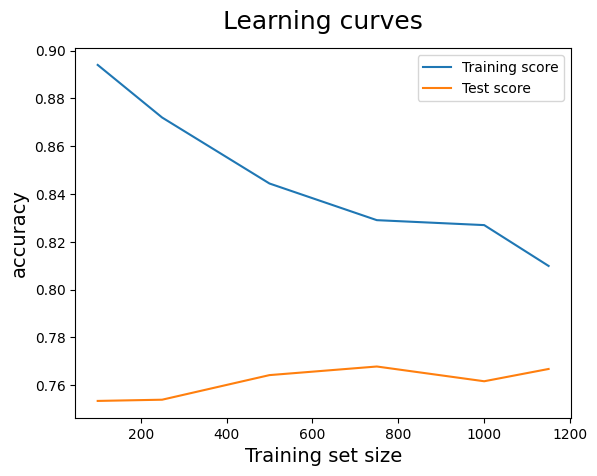

In [48]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()